In [92]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Extrair os dados - [IPEA](http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view)

In [93]:
df_ipea = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE4/tech_challenge_4/dados/ipeadata.csv',  encoding='iso-8859-1',  sep=';')
df_ipea.head(5)

,Data,Preço - petróleo bruto - Brent (FOB)
0,20/05/1987,"18,63"
1,21/05/1987,"18,45"
2,22/05/1987,"18,55"
3,25/05/1987,"18,6"
4,26/05/1987,"18,63"


## Verificar base de dados (formato, informações, dados null, duplicidade)

In [94]:
print(f"\n----------------------------- shape -----------------------------\n")
# Dimensões do DataFrame
print(df_ipea.shape)

print(f"\n----------------------------- info -----------------------------\n")
# Usando info()
df_ipea.info()

print(f"\n---------------------------- isnull -----------------------------\n")
# Contagem de valores nulos
print(df_ipea.isnull().sum())

print(f"\n-------------------------- duplicated --------------------------\n")
# Verificar duplicados
print(df_ipea.duplicated().sum())


----------------------------- shape -----------------------------

(11188, 2)

----------------------------- info -----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11188 entries, 0 to 11187
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11188 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11188 non-null  object
dtypes: object(2)
memory usage: 174.9+ KB

---------------------------- isnull -----------------------------

Data                                    0
Preço - petróleo bruto - Brent (FOB)    0
dtype: int64

-------------------------- duplicated --------------------------

0


## Limpar e ajustar dados

In [95]:
def limpar_df_ipea(df_ipea):
    # Renomear colunas
    df_ipea.rename(columns={
        'Data': 'data',
        'Preço - petróleo bruto - Brent (FOB)': 'valor',
    }, inplace=True)

    # Tranformar coluna data em datetime
    df_ipea['data'] = pd.to_datetime(df_ipea['data'], format='%d/%m/%Y')

    # Tranformar valor para float
    df_ipea['valor'] = df_ipea['valor'].str.replace(',', '.').astype(float)

    # Ordenar os dados por data (do mais antigo para o mais atual)
    df_ipea.sort_values(by=['data'], ascending=True, inplace=True)

    # Data como index
    df_ipea.set_index('data', inplace=True)

limpar_df_ipea(df_ipea)

In [96]:
# Criar colunas de ano, mes e dia
df_ipea['ano'] = pd.DatetimeIndex(df_ipea.index).year
df_ipea['mes'] = pd.DatetimeIndex(df_ipea.index).month
df_ipea['dia'] = pd.DatetimeIndex(df_ipea.index).day

In [97]:
df_ipea.head(5)

,valor,ano,mes,dia
data,,,,
1987-05-20,18.63,1987,5,20
1987-05-21,18.45,1987,5,21
1987-05-22,18.55,1987,5,22
1987-05-25,18.60,1987,5,25
1987-05-26,18.63,1987,5,26


# Análise de dados

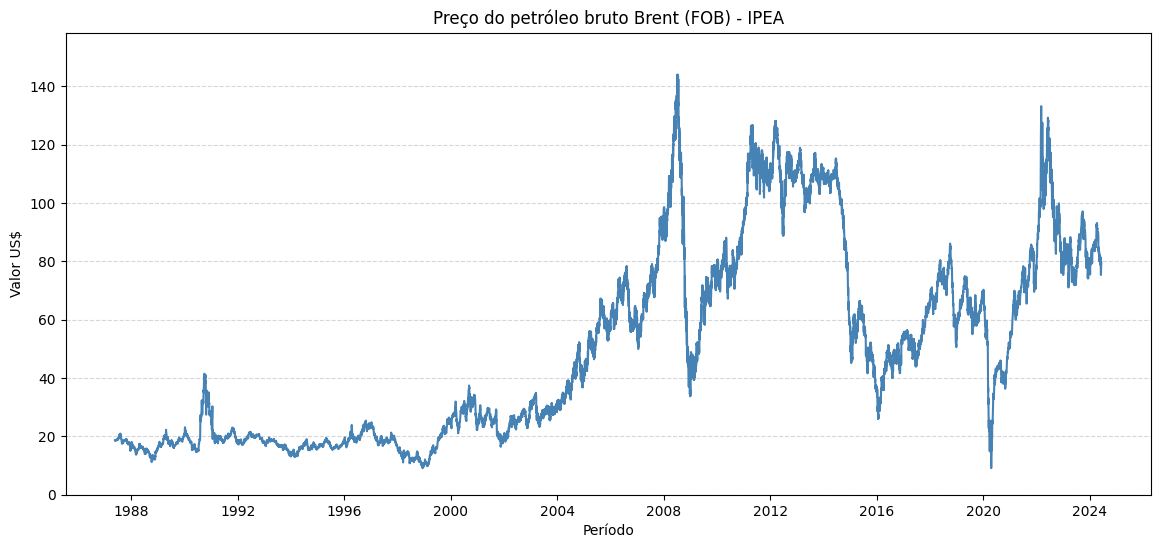

In [98]:
plt.figure(figsize=(14,6))

sns.lineplot(data=df_ipea, x="data", y="valor", color='#4682b4')

plt.title("Preço do petróleo bruto Brent (FOB) - IPEA")
plt.xlabel("Período")
plt.ylabel("Valor US$")
plt.grid(linestyle="--", axis='y', alpha=0.5)
plt.ylim(0, df_ipea['valor'].max() * 1.1)

plt.show()

## Pontos historicos que influenciaram o preço do petróleo bruto

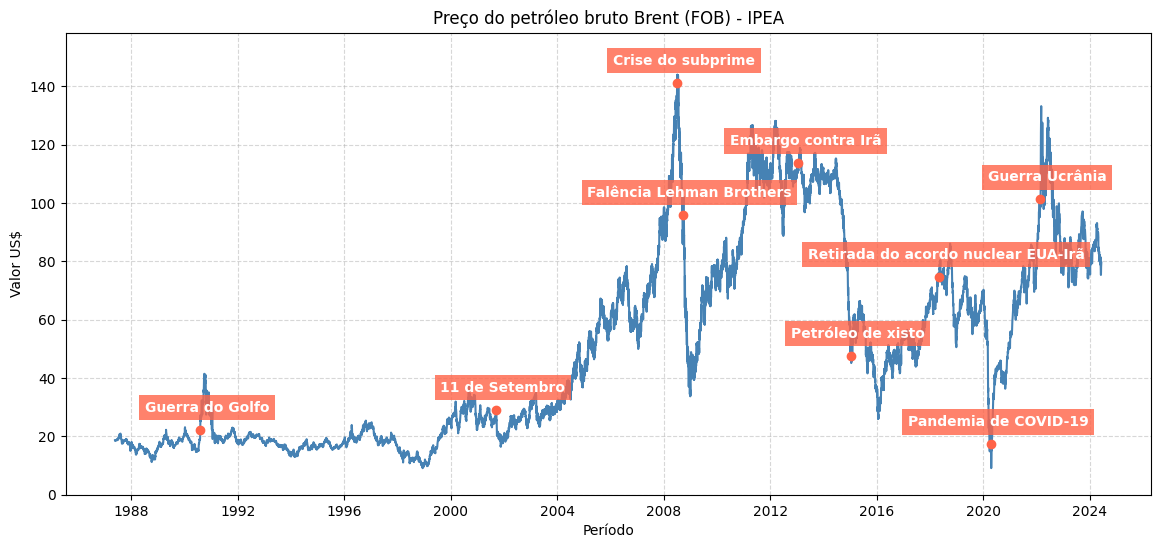

In [99]:
# Pontos historicos que influenciaram o preço do petróleo bruto
fig, ax = plt.subplots(figsize=(14, 6))

# Plotar a linha do preço do petróleo
sns.lineplot(data=df_ipea, x=df_ipea.index, y="valor", color='#4682b4', ax=ax)

# Adicionar pontos de destaque com legendas
highlight_points = [
    # ('1987-10-19', 'Black', 'tomato'),
    ('1990-08-02', 'Guerra do Golfo', 'tomato'),
    ('2001-09-11', '11 de Setembro', 'tomato'),
    ('2008-07-02', 'Crise do subprime', 'tomato'),
    ('2008-09-15', 'Falência Lehman Brothers', 'tomato'),
    ('2013-01-23', 'Embargo contra Irã', 'tomato'),
    ('2015-01-13', 'Petróleo de xisto', 'tomato'),
    ('2018-05-08', 'Retirada do acordo nuclear EUA-Irã', 'tomato'),
    ('2020-04-20', 'Pandemia de COVID-19', 'tomato'),
    ('2022-02-24', 'Guerra Ucrânia', 'tomato')
]

for date, label, color in highlight_points:
    x = pd.to_datetime(date)
    y = df_ipea.loc[x, 'valor']
    ax.scatter(x, y, color=color, zorder=10)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(5, 13),
        ha='center',
        color='white',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor=color, alpha=0.8, edgecolor='none')
    )

ax.set_title("Preço do petróleo bruto Brent (FOB) - IPEA")
ax.set_xlabel("Período")
ax.set_ylabel("Valor US$")
ax.grid(linestyle="--", alpha=0.5)
ax.set_ylim(0, df_ipea['valor'].max() * 1.1)

plt.show()


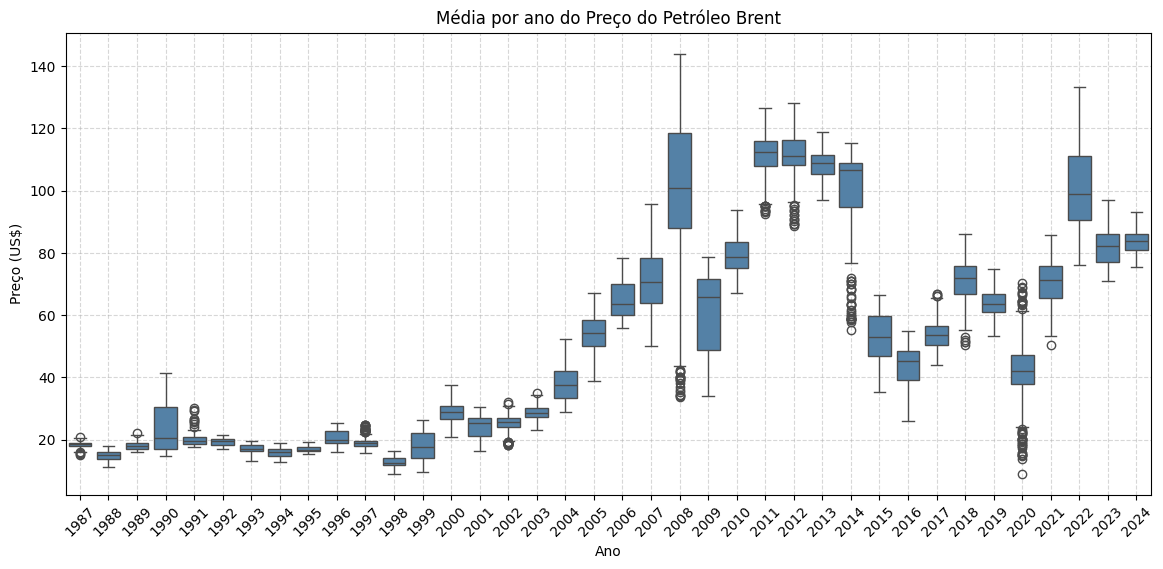

In [100]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(data=df_ipea, x='ano', y='valor', ax=ax, color='#4682b4')

ax.set_title('Média por ano do Preço do Petróleo Brent')
ax.set_xlabel('Ano')
ax.set_ylabel('Preço (US$)')

plt.xticks(rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()
